# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing

from utils.plotter import plot_SVM_DecisionBoundary

from ipyparallel import Client
rc = Client()
print(rc.ids)

[0, 1, 2, 3]


/home/zerosum24/.conda/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

In [2]:
# (a) # Loading the training dataset and only keeping the necessary attributes:

# loading the Images_A_Train dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
images_A_Train = pd.read_csv(data_path)

# last data structure to hold unwanted attributes
indx_lst = []

# Building a list of any features that are not visual features and are not the is_person attribute
for attribute in images_A_Train.columns:
    # ensuring attribute is not a visual feature, and that it is not is_person
    if attribute[0:2] =="is" and attribute != "is_person" or attribute=="imgId":
        indx_lst.append(attribute)

# dropping collected attributes and updating the dataset
images_A_Train.drop(columns=indx_lst, axis=1, inplace=True)

In [3]:
# (b) # Summarising key properties of the data using the appropriate pandas methods:

# displaying overview information
images_A_Train.info() 

# displaying statistical information about the dataset
images_A_Train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 501 entries, dim1 to is_person
dtypes: float64(495), int64(6)
memory usage: 8.0 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


(c) ***My answer:***

There are 2093 entries in the dataset altogether, each of these represents an image which can be labelled as one of 19 classes. There are also 501 attributes in the dataset altogther: 500 of them represent dimensions of the image, with an additional attribute representing that the true label - whether the image is of a person. 

What is strange about the data is that despite having 500 dimension attributes and 1 attribute representing is_person the data types are split into 495 of type float64 , 6 of type int64 and 1 of type object. This is strange because the fact that the attributes have any int64 types at all rather than all just conforming to float64 is unusual.

The mean for is_person is 0.449116 rather than 0.5 even though this is a binary value. This suggests the training data is skewed towards the images not being a person and might represent a problem for training.

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

In [4]:
# (a) # Loading the testing dataset and only keeping the necessary attributes:

# loading the Images_A_Train dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
images_A_Test = pd.read_csv(data_path)

# last data structure to hold unwanted attributes
indx_lst = []

# Building a list of any features that are not visual features and are not the is_person attribute
for attribute in images_A_Test.columns:
    # ensuring attribute is not a visual feature, and that it is not is_person
    if attribute[0:2] =="is" and attribute != "is_person" or attribute=="imgId":
        indx_lst.append(attribute)

# dropping collected attributes and updating the dataset
images_A_Test.drop(columns=indx_lst, axis=1, inplace=True)

In [5]:
# (b) # Summarising key properties of the data using the appropriate pandas methods:

# displaying overview information
images_A_Test.info() 

# displaying statistical information about the dataset
images_A_Test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 501 entries, dim1 to is_person
dtypes: float64(494), int64(7)
memory usage: 4.3 MB


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


(c) ***My answer:***

The dimensionality involves 1113 observations with 501 attributes. There are almost half the amount of observations in the test set compared to the training set.

The test set has the same strangeness with the types of the attributes. However, rather than have 6 attributes with type int64 it has a futher one with that type, so there are 7 attributes with int64 and 494 with float64.

Similar to the training data, the mean for is_person is 0.473495 rather than 0.5 even though this is a binary value. This suggests the training data is skewed towards the images not being a person and might represent a problem for training.

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

In [6]:
# (a) # Split both the training and testing sets into a matrix of features:

# Matrix of independent features variables
X_tr = images_A_Train.drop(columns=['is_person'], axis=1).values
X_tst = images_A_Test.drop(columns=['is_person'], axis=1).values

# Vector of dependent variables
y_tr = images_A_Train['is_person'].values
y_tst = images_A_Test['is_person'].values

print("Independent training {0}/testing {1}".format(X_tr.shape, X_tst.shape))
print("Dependent training {0}/testing {1}".format(y_tr.shape, y_tst.shape))

dimen_check = (X_tr.shape[0] == y_tr.shape[0]) and (X_tst.shape[0] == y_tst.shape[0])
print("\nThe independent and dependent training datasets have the same dimensionality: {0}".format(dimen_check))

Independent training (2093, 500)/testing (1113, 500)
Dependent training (2093,)/testing (1113,)

The independent and dependent training datasets have the same dimensionality: True


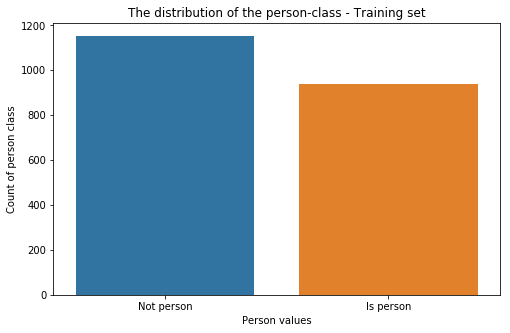

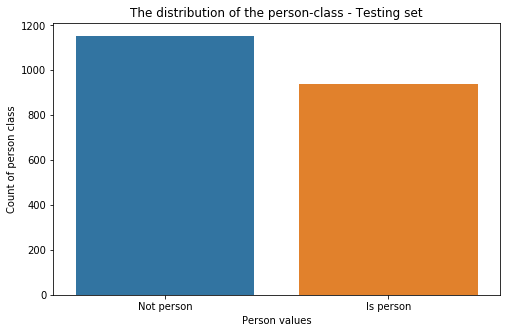

In [7]:
# (b) # Visualising the distribution of the person-class (True/False) in the training and testing sets:

# Plotting the first countplot of the training set
plt.figure(figsize=(8,5))
sns.countplot(x=y_tr, data=images_A_Train)

# Adding a title and labels
plt.title("The distribution of the person-class - Training set")
plt.xlabel('Person values')
plt.ylabel('Count of person class')
plt.xticks([0,1], ["Not person", "Is person"])

# Displaying the graph
plt.show()


# Plotting the second countplot of the testing set
plt.figure(figsize=(8,5))
sns.countplot(x=y_tr, data=images_A_Test)

# Adding a title and labels
plt.title("The distribution of the person-class - Testing set")
plt.xlabel('Person values')
plt.ylabel('Count of person class')
plt.xticks([0,1], ["Not person", "Is person"])

# Displaying the graph
plt.show()


(c) ***My answer:***

The distribution of the both the testing and training set are skewed: the images are not evenly distributed between those that are persons and those that are not. This may create a problem for classification as it may bias the classifier towards an image being not a person. 

Classification accuracy would not be a good metric as a result. This is because it does not handle unbalanced classes well. For example, if predicting whether an earthquake is about to happen: since they happen very rarely, there would be a very good accuracy if they always predicted "No". Optimising for this may make the occurance of earthquakes very difficult to predict.

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

(a) ***My answer:***

A baseline classifier for this dataset is 50/50 probabilty classifier modelled on flipping a coin. This is relevant as the is_person attribute we are predicting has a discrete set of binary values {0,1}. If we choose a baseline classifier which predicted all the values to be of one of the two types, we would expect that classifier to have a 50% accuracy (based on a dataset with an even distribution between true/false observations. This baseline is useful as it is a simple classifier, and you should always choose the simplist baseline to compare your more advanced models to.

In using a DummyClassifier model, I have replicated this by setting each prediction to have the most frequent classication value. This maintains simplicity and is useful as it shows the results as they would be just based on the skewed data set.

In [8]:
# (b) # Your Code goes here:

# Uses Dummy classifier to estimate the likelihood of the image

base_class = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_tr, y_tr)
base_pred = base_class.predict(images_A_Test)

accuracy = accuracy_score(y_true=y_tst, y_pred=base_pred)

print("Accuracy a binary classifier would achieve on the testing set: {0:.3f} (to 3 decimal places)."
      .format(accuracy))

Accuracy a binary classifier would achieve on the testing set: 0.527 (to 3 decimal places).


### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

In [9]:
# (a) # Training a LogisticRegression classifier using default settings:

# Training the LogisticRegression classifier
lrc = LogisticRegression(solver='lbfgs').fit(X_tr, y_tr)

# Predicting the values of the validation set
lrc_pred = lrc.predict(X_tst)

# Calculating and printing the accuracy score
print("Classification accuracy score on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc.score(X_tst, y_tst)))

Classification accuracy score on the testing set: 0.527 (to 3 decimal places).


(b) ***My answer:***

The logistic regression classifier has the same classification accuracy score as the baseline classifier. This is very surprising as the baseline is a very simple classifier.

Baseline Model : Logarithmic loss on the testing set: 16.354 (to 3 decimal places).
Logistic Regression Model: Logarithmic loss on the testing set: 16.354 (to 3 decimal places).


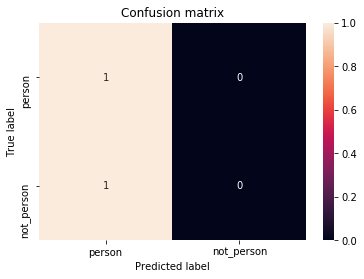

In [10]:
# (c) # Visualising the errors using an appropriate method:

# Logarithmic Loss function is a useful method here as it views the errors differently to Classification Accuracy 

# Baseline method
base_logloss = log_loss(y_true=y_tst, y_pred=base_pred)

# Logistic Regression method
lrc_logloss = log_loss(y_true=y_tst, y_pred=lrc_pred)

print("Baseline Model : Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places).".format(base_logloss))
print("Logistic Regression Model: Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc_logloss))



def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(np.array(y_tst), lrc_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=['person','not_person'])
plt.show()

(d) ***My answer:***

The classification accuracy for both classifiers is the same. The plotted confusion matrix is also showing that the logistic regression classifier is only classifing images as person, regardless of whether they are or not. In this way it is acting like the DummyClassifier by only predicting the same value for each.

Based on what was observed in Q1.1, I believe this is due to the strange typing of some of the dimensions - being int64 rather than float64. This may be causing errors with the classifier.

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

(a) ***My answer:***

The training and the testing set both have to be preprocessed in the same way. Otherwise this could have repercussions of reducing the accuracy depending on which is being preprocessed. For instance, if only the testing set were to be transformed the classifier will be more likely to be overfit to that set.

In [11]:
# (b) # Processing the features in both the training as well as the testing sets:

# Using the Standard scaler package from sklearn
scaler = preprocessing.StandardScaler().fit(X_tr)
scaler

X_tr_scaled = scaler.transform(X_tr) 
X_tst_scaled = scaler.transform(X_tst)

# This can produce warnings below which confirm the data is being converted to float64


Classification accuracy score on the testing set: 0.643 (to 3 decimal places).
Baseline Model : Logarithmic loss on the testing set: 16.354 (to 3 decimal places).
Logistic Regression Model: Logarithmic loss on the testing set: 12.320 (to 3 decimal places).


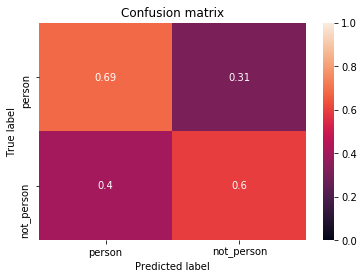

In [12]:
# (c) # Training a Logistic Regressor on the transformed training set:

# Training the LogisticRegression classifier
lrc = LogisticRegression(solver='lbfgs').fit(X_tr_scaled, y_tr)

# Predicting the values of the validation set
lrc_pred = lrc.predict(X_tst_scaled)

# Calculating and printing the accuracy score
print("Classification accuracy score on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc.score(X_tst_scaled, y_tst)))

# Logistic Regression method
lrc_logloss = log_loss(y_true=y_tst, y_pred=lrc_pred)

print("Baseline Model : Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places).".format(base_logloss))
print("Logistic Regression Model: Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc_logloss))

cm = confusion_matrix(np.array(y_tst), lrc_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=['person','not_person'])
plt.show()


(d) ***My answer:***

The classification accuracy is now higher than the baseline and the previous confusion matrix. The scaling has resolved the difficulty with the unusual types which appears to have fixed the problem. The classifier's confusion matrix now looks a lot more reasonable, with a range of classifications rather than just one fixed label.

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier on the entire training set and report the classification accuracy on the test set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

(a) ***My answer:***

The purpose of cross-validation is to identify learning parameters that generalise well across the population samples we learn from in each fold. Cross-validation allows us to find learning parameters that produce on average the best performance in all folds. We can then use these to train a model on the entire dataset.

This is useful way to get an accurate impression of how well the model generally performs. Just focusing on the testing set could result in an accuracy from the model representing an overfitting to choosen training and testing sets, and any of their peculiarities, rather than an impression of how the classifier performs as whole.

In [13]:
# (b) # Load the datasets and extracting the relevant columns:

## Loading the training and testing datasets

# Loading the Images_B_Train.csv dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
images_B_Train = pd.read_csv(data_path)

# Loading the Images_B_Test.csv dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
images_B_Test = pd.read_csv(data_path)


## Finding the unwanted attributes and dropping them from the datasets

# dropping collected attributes and updating the datasets
images_B_Train.drop(columns=indx_lst, axis=1, inplace=True)
images_B_Test.drop(columns=indx_lst, axis=1, inplace=True)

print("B_train shape {0} and B_test shape {1}".format(images_B_Train.shape, images_B_Test.shape))

## Split both the training and testing sets into a matrix of features:

# Matrix of independent features variables
X_train = images_B_Train.drop(columns=['is_person'], axis=1).values
X_test = images_B_Test.drop(columns=['is_person'], axis=1).values

# Vector of dependent variables
y_train = images_B_Train['is_person'].values
y_test = images_B_Test['is_person'].values

B_train shape (2093, 501) and B_test shape (1113, 501)


In [14]:
# (c) # Using Cross-Validation on the Training set, performing a search for the best value of C:

# initialising the folds and possible values of c
no_folds = 5
c_vals = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]

# initialising the kfold object and array
kf = KFold(n_splits=no_folds, shuffle=True, random_state=0)
arr = np.zeros((5,11))

# lopping over each possible value of c
for no, c_val in enumerate(c_vals):
    # calculating the cross val score for each training classifier with value of c
    lr_c = LogisticRegression(solver='lbfgs', C=c_val)
    
    score = cross_val_score(lr_c, X_train, y_train, cv=kf)

    # calculating the values for each fold
    for fold in range(no_folds):   
        arr[fold, no] = score[fold]

# printing the best value of c
best_c_val = c_vals[np.argmax(np.mean(arr,0))]
print("The best value of C is: {0}".format(best_c_val))

The best value of C is: 0.001


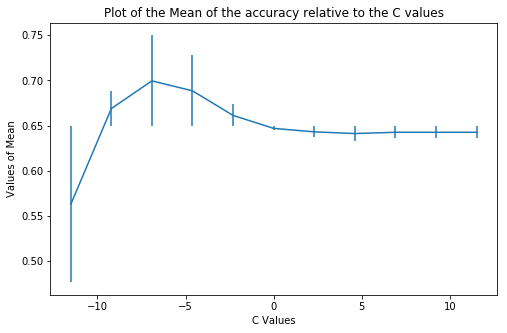

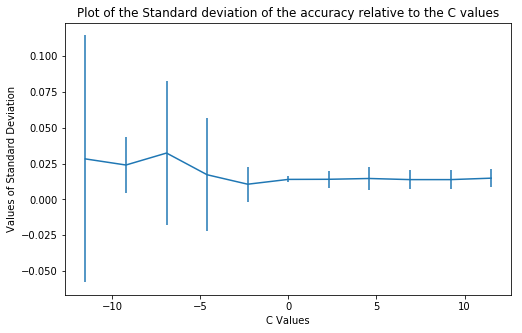

The best value of C is: 0.001


In [15]:
# (d) # Plotting the mean and standard-deviation (across folds) of the accuracy as a function of C:

# Calculating the mean and standard deviation of the accuracy per fold
std_deviation = []
mean_array = []
for i in range(len(c_vals)):
    std_deviation.append(np.std(arr[:,i]))
    mean_array.append(np.mean(arr[:,i]))

# Plotting the figure of the mean of accuracy relative to the c values
plt.figure(figsize=(8,5))
plt.errorbar(np.log(c_vals), mean_array, yerr=mean_array-np.mean(mean_array))

# setting the titles and labels
plt.title("Plot of the Mean of the accuracy relative to the C values")
plt.xlabel("C Values")
plt.ylabel("Values of Mean")

# displaying the plot
plt.show()

# Plotting the figure of the mean of accuracy relative to the c values
plt.figure(figsize=(8,5))
plt.errorbar(np.log(c_vals), std_deviation, yerr=mean_array-np.mean(mean_array))

# setting the titles and labels
plt.title("Plot of the Standard deviation of the accuracy relative to the C values")
plt.xlabel("C Values")
plt.ylabel("Values of Standard Deviation")

# displaying the plot
plt.show()

# Displaying the best value of c
print("The best value of C is: {0}".format(best_c_val))

(e) ***My answer:***

The mean value of the accuracy reach a maximum when the c value nears 0, the gradient then slopes downward and is constant. As the c value nears 0 the standard deviation of the accuracy is larger too.

Classification accuracy score on the testing set: 0.699 (to 3 decimal places).
Baseline Model : Logarithmic loss on the testing set: 16.354 (to 3 decimal places).
Logistic Regression Model: Logarithmic loss on the testing set: 10.396 (to 3 decimal places).


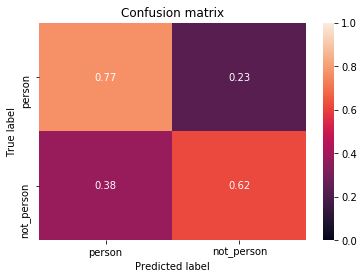

In [16]:
# (f) # Using the optimal c value to train a new LogisticRegression classifier on the entire training set:

# Training the LogisticRegression classifier
lrc_best = LogisticRegression(solver='lbfgs', C=best_c_val).fit(X_train, y_train)

# Predicting the values of the validation set
lrc_best_pred = lrc_best.predict(X_test)

# Calculating and printing the accuracy score
print("Classification accuracy score on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc_best.score(X_test, y_test)))

# Logistic Regression method
lrc_best_logloss = log_loss(y_true=y_test, y_pred=lrc_best_pred)

print("Baseline Model : Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places).".format(base_logloss))
print("Logistic Regression Model: Logarithmic loss on the testing set: {0:.3f} (to 3 decimal places)."
      .format(lrc_best_logloss))

# creating a confusion matrix, normalising it and plotting it using the standard method
cm = confusion_matrix(y_test, lrc_best_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=['person','not_person'])
plt.show()

### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

In [17]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

In [18]:
# (d) # Your Code goes here:

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotter` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

SVM - Linear score: 0.616 (to 3 d.p.)
SVM - Rbf score: 0.628 (to 3 d.p.)
SVM - Poly score: 0.577 (to 3 d.p.)


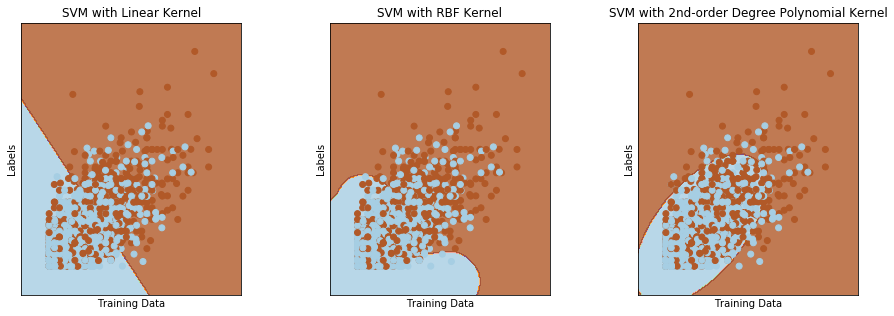

In [19]:
# (a) # Training three distinct classifiers and plotting the decision boundaries for all three:

# Setting up the variables including X with only 2 columns
desired_columns = [images_B_Train.columns[20], images_B_Train.columns[50]]
X_train = images_B_Train.filter(desired_columns).values
y_train = images_B_Train['is_person'].values

# Training an SVM with a Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X=X_train, y=y_train)
print("SVM - Linear score: {0:.3g} (to 3 d.p.)".format(svm_linear.score(X_train, y_train)))

# Training an SVM with a RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1)
svm_rbf.fit(X=X_train, y=y_train)
print("SVM - Rbf score: {0:.3g} (to 3 d.p.)".format(svm_rbf.score(X_train, y_train)))

# Training an SVM with a 2nd-order degree polynomial Kernel
svm_poly = SVC(kernel='poly', degree=2, C=1)
svm_poly.fit(X=X_train, y=y_train)
print("SVM - Poly score: {0:.3g} (to 3 d.p.)".format(svm_poly.score(X_train, y_train)))

# Plotting the SVM Decision Boundary
plot_SVM_DecisionBoundary(clfs=[svm_linear, svm_rbf, svm_poly], X=X_train, y=y_train, 
                          title=['SVM with Linear Kernel', 'SVM with RBF Kernel', 
                                 'SVM with 2nd-order Degree Polynomial Kernel'],
                          labels=['Training Data', 'Labels'])


(b) ***My answer:***

The shape of the decision boundary for the linear kernel (Score: 0.616 (to 3 d.p.)), is a straight line which interects the data: classifying all to the left of the data as images. This interection produces a good accuracy score relative to the other two svms, with a high number of correctly labelled values being on the correct sides of the boundary line.

The shape of the decision boundary for the radial basis kernel (Score: 0.628 (to 3 d.p.)), it has a double curved shape which produces the best accuracy of the models. This decision boundary avoids misclassifiying some of the non_person images with its dip in the middle. This helps with the classification accuracy.

The shape of the decision boundary for the 2nd-order degree polynomial kernel (Score: 0.628 (to 3 d.p.)), is limited by its degree to have no inflection points, appearing as one smooth curve. This kernel that performs the worst of the three kernel types, as it looks like it has a high amount of false positives with the amount of non_person images it is classifying as person images.

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

In [20]:
# (a) # Defining an appropriate search space for C, brute forcing all combinations for poly svm and reporting best:

# Matrix of independent features variables
X_train = images_B_Train.drop(columns=['is_person'], axis=1).values
X_test = images_B_Test.drop(columns=['is_person'], axis=1).values

# Vector of dependent variables
y_train = images_B_Train['is_person'].values
y_test = images_B_Test['is_person'].values

# initialising loop values
no_folds = 5
c_vals = [1e-2, 1e-1, 1e1, 1e0, 1e1, 1e2, 1e3]
degree_range = [1, 2, 3, 4, 5]

# to keep track of the accuracy scores
accuracy_track = np.zeros((5,7))

# iterating over each c value
for no_c, c_val in enumerate(c_vals):
    print("Current c val: {0}".format(no_c))
    
    # iterating over each degree value
    for no, degree in enumerate(degree_range):
        print("Current c val: {0}, degree val {1}".format(no_c, no))
        
        # creating a new poly svm with the paramaters and calculating the cross_val score        
        svm_poly = SVC(kernel='poly', degree=degree, C=c_val)
        score = cross_val_score(svm_poly, X_train, y_train, cv=kf)
        
        # iterating over each fold value and updating the accuracy_track
        for fold in range(no_folds):
            accuracy_track[fold, no_c] = score[fold]

# Printing the accuracy values
print("Tracked cross-validation accuracy values: \n{0}".format(accuracy_track))

Current c val: 0
Current c val: 0, degree val 0
Current c val: 0, degree val 1
Current c val: 0, degree val 2
Current c val: 0, degree val 3
Current c val: 0, degree val 4
Current c val: 1
Current c val: 1, degree val 0
Current c val: 1, degree val 1
Current c val: 1, degree val 2
Current c val: 1, degree val 3
Current c val: 1, degree val 4
Current c val: 2
Current c val: 2, degree val 0
Current c val: 2, degree val 1
Current c val: 2, degree val 2
Current c val: 2, degree val 3
Current c val: 2, degree val 4
Current c val: 3
Current c val: 3, degree val 0
Current c val: 3, degree val 1
Current c val: 3, degree val 2
Current c val: 3, degree val 3
Current c val: 3, degree val 4
Current c val: 4
Current c val: 4, degree val 0
Current c val: 4, degree val 1
Current c val: 4, degree val 2
Current c val: 4, degree val 3
Current c val: 4, degree val 4
Current c val: 5
Current c val: 5, degree val 0
Current c val: 5, degree val 1
Current c val: 5, degree val 2
Current c val: 5, degree val 3

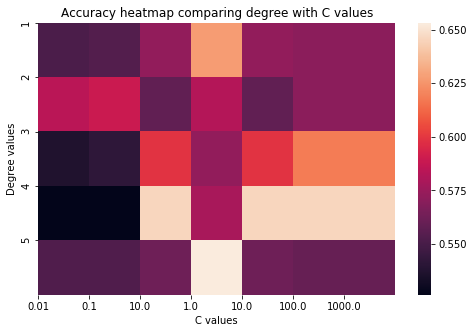

The best value of C is: 1.0
The best degree value is: 4
Therefore the parameters which produce the highest accuracy together are: C value - 1.0 and degree value - 4.


In [35]:
# (b) # Plotting the fold-averaged classification accuracy and showing the parameters with the best accuracy:

fold_class_acc = []

# looping for each c value
for i in range(len(c_vals)):
    # adding the mean of the 
    fold_class_acc.append(np.mean(accuracy_track[:,i]))
    
# converting fold acc to numpy and reshaping 
fold_class_acc = np.array(fold_class_acc)
fold_class_acc = fold_class_acc.reshape(7,1)

# Plotting the heatmap figure
plt.figure(figsize=(8,5))
sns.heatmap(accuracy_track)

# Updating the title and axis labels 
plt.title("Accuracy heatmap comparing degree with C values")
plt.xlabel("C values")
plt.ylabel("Degree values")

# Updating the axis values
plt.xticks([0,1,2,3,4,5,6], c_vals)
plt.yticks([0,1,2,3,4], [1,2,3,4,5])

# displaying the heatmap
plt.show()

# Printing the best parameters
best_c_val = c_vals[np.argmax(np.mean(accuracy_track,0))]
print("The best value of C is: {0}".format(best_c_val))

# calculating by finding the index of the row with the highest (max of) max value
degree = np.argmax(list(map(lambda x: max(x), accuracy_track)))
print("The best degree value is: {0}".format(degree))

print("Therefore the parameters which produce the highest accuracy together are: C value - {0} and degree value - {1}."
          .format(best_c_val, degree))

In [32]:
# (c) # Retrain the (polynomial-kernel) SVC using the optimal parameters:

# Fitting the optimal poly cvm
svm_poly_opt = SVC(kernel='poly', degree=degree, C=best_c_val)
svm_poly_opt.fit(X_train, y_train)

# Calculating the accuracy on the test set
accuracy_test = svm_poly_opt.score(X=X_test, y=y_test)

# Printing the test set accuracy
print("Test set accuracy is {:.3g} (to 3 d.p.).".format(accuracy_test))

Test set accuracy is 0.677 (to 3 d.p.).


(d) ***My answer:***

This has the highest accuracy on the testing set (0.677 (to 3 d.p.) of any classifier in this coursework. When compared with the LinearRegression classifier (0.643 (to 3 d.p.)), it performs favourably. However, the significant computational time (Q2.7a) difficult on my laptop) required to achieve this optimisation calls into question 

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

(b) ***Your answer goes here:***

(c) ***Your answer goes here:***

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)